<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/04_podstawy_sklearn/05_Regresja_wielomianowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn


Polynomial Regression - Regresja Wielomianowa¶
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

Rozważmy model regresji liniowej:$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$Dodając cechy wileomianowe otrzymujemy:$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$Wyobraźmy sobie teraz nastepujące podstawienie:$$z = [1, x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$Wrzucając to z powrotem do naszego modelu dotrzymujemy prosty model liniowy:$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik.

[ -59.49384528   43.64063722  -92.38219605   96.0934639   -15.95972902
 -108.69647296   -0.41180226   38.93442884   76.13629581  -94.85435159
   23.51009794  -51.51401757  -40.63242695   63.72297538  -31.88420544
  143.57844631  102.67701563   11.11123508   28.96570475  -61.11972483
  -53.0050068   -77.31351687   58.3244737     7.16785478  -46.7556932
   35.52712213   38.09312381   93.63893269   17.19074378   91.88423724
  -29.80516353  -15.95528924  -82.75344721   31.65417044   10.12120915
   79.469764   -108.54741738  119.42155887   15.76428469 -145.33745376]
[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


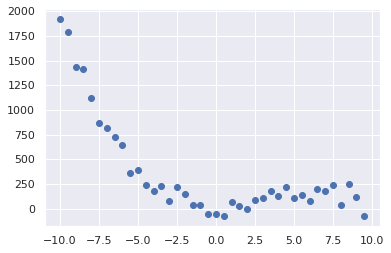

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X = np.arange (-10, 10, 0.5)
noise = 80 * np.random.randn(40) 
y = -X**3 + 10*X**2 + 2*X + 3 + noise
print(noise)
print(X)
X = X.reshape(40, 1)
_ = plt.scatter(X, y)

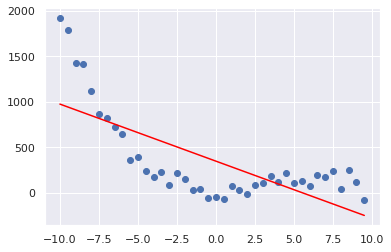

In [21]:
# dostosujmy model liniowy, żeby sprawdzić jaki byłby jego błąd

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c = 'red')

In [23]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.515285027577226

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złozoność modelu do naszego problemu.

Rozważmy model regresji liniowej:$$\hat{y}(w, x) = w_0 + w_1 x_1$$Dodając cechy wielomianowe otrzymujemy:$$\hat{y}(w, x) = w_0 + w_1 x_1 +w_2x_1^2 $$Wyobraźmy sobie teraz nastepujące podstawienie:$$z = [1, x_1, x_1^2]$$Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2$$

In [33]:
# Ekstrakcja cech wielmianowych stopień 2
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

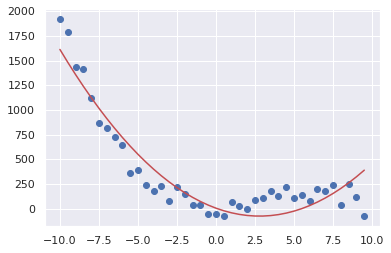

In [34]:
# Dopasowanie modelu
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred = regressor_poly.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [35]:
r2_score(y, y_pred)

0.8868083563617074

In [38]:
# Ekstrakcja cech wielmianowych stopień 3
np.set_printoptions(suppress = True)

poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

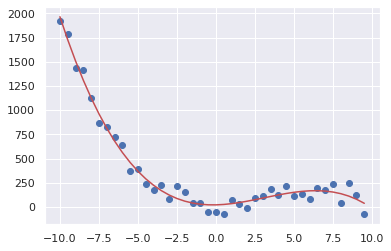

In [43]:
# Dopasowanie modelu
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.scatter(X, y)
_ = plt.plot(X, y_pred_3, c='r')

In [44]:
r2_score(y, y_pred_3)

0.9816060309695029